# Perceptron and Single-Layer NN




#### Iris Dataset

In [93]:
# !wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [17]:
import numpy as np

data = np.genfromtxt('iris.data', delimiter=',', usecols=(0,1,2,3))
print(data[:5,])
print(data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)


#### First 2 classes only

In [95]:
X = data[:100,]

In [96]:
y = np.zeros(100)
y[50:] = 1

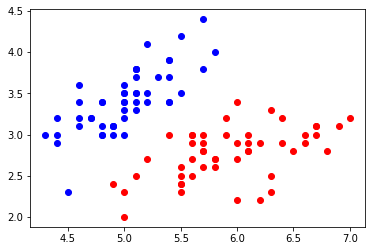

In [97]:
import matplotlib.pyplot as plt

plt.plot(X[:50,0], X[:50,1], 'o', c='b')
plt.plot(X[50:,0], X[50:,1], 'o', c='r')
plt.show()

#### Perceptron starting weights

In [98]:
np.random.seed(seed=1)
w = np.random.rand(4)

#### Threshold

In [99]:
t = 0.5

#### Apply weights to first observation

In [100]:
o = float(np.dot(X[0,], w) > t)
print(o)
print(y[0])

1.0
0.0


#### Perceptron code

In [101]:
def percep(X, y, t, steps, l):
    w = np.random.rand(X.shape[1]) # UPDATE!!!
    for j in range(steps):
        for i in range(X.shape[0]):
            o = float(sum(X[i,] * w) > t)
            w += l * (y[i] - o) * X[i,] 
    return w

w = percep(X, y, t, 10, 0.02)

print(w)

[-0.06124411 -0.08166141  0.20626021  0.36956073]


#### Perfect separation 

In [102]:
p = (np.dot(X, w)>t)*1
print(p, sum(p))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 50


#### Sigmoid Function

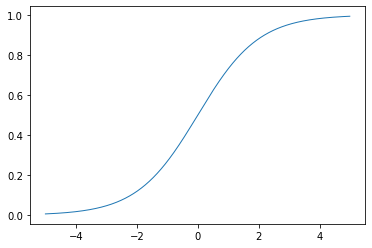

In [103]:
f = lambda x: 1. / (1. + np.exp(-x))

xs = np.arange(-5, +5, .01)
plt.plot(xs, f(xs), lw=1)
plt.show()

#### Single-layer feed-forward Neural Net with Gradient Descent

In [104]:
def f(x):
    return 1. / (1. + np.exp(-x))

def nn1(X, y, l=0.01, epochs=50):
    w = np.random.rand(X.shape[1]) - 0.5
    for ep in range(epochs):
        h = np.dot(X, w)
        a = f(h)
        e = a - y
        w += np.dot(-l * (a - y) * a * (1 - a), X)
        # if ep % (epochs/10) == 0: print(w, sum(e**2))
    return w, sum(e**2)

In [105]:
w, e = nn1(data[:100,], y)
print(w, e)

[-0.31404571 -0.87156577  1.36248551  0.80165054] 0.8859153983322959


#### Perfect Separation

when interpreting output layer as class = activation > 0.5

In [106]:
p = 1 * (f(np.dot(X, w)) > 0.5)
print(p, sum(p))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 50


#### Car evaluation dataset

https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Here we need to do some conversion on the non-numeric input:

In [4]:
import pandas as pd

d0 = { 'vhigh':3, 'high':2, 'med':1, 'low':0 }
d2 = { '2':2, '3':3, '4':4, '5more':5 }
d3 = { '2':2, '4':4, 'more':6 }
d4 = { 'small':0, 'med':1, 'big':2 }
d5 = { 'low':0, 'med':1, 'high':2 }
d6 = { 'unacc':0, 'acc':1, 'good':1, 'vgood':1 }

df = pd.read_csv('car.data', header=None, 
    converters={0: lambda x: d0[x], 
                1: lambda x: d0[x],
               2: lambda x: d2[x],
               3: lambda x: d3[x],
               4: lambda x: d4[x],
               5: lambda x: d5[x],
               6: lambda x: d6[x],} )
print(df[6].value_counts())

df1 = pd.read_csv('car.data', header=None) 
cat_columns = df1.select_dtypes(['object']).columns
df1[cat_columns] = df1[cat_columns].apply(lambda x: pd.factorize(x)[0])
df1.head()

0    1210
1     518
Name: 6, dtype: int64


0  1  2  3  4  5  6
0  0  0  0  0  0  0  0
1  0  0  0  0  0  1  0
2  0  0  0  0  0  2  0
3  0  0  0  0  1  0  0
4  0  0  0  0  1  1  0

In [108]:
df.head()

0  1  2  3  4  5  6
0  3  3  2  2  0  0  0
1  3  3  2  2  0  1  0
2  3  3  2  2  0  2  0
3  3  3  2  2  1  0  0
4  3  3  2  2  1  1  0

#### Balanced Classes

Equal number of observations in all classes 
- avoids learning to always predict the most frequent class
- makes it easier for us to interpret training outcomes

In [109]:
n = min(df[6].value_counts())
print(n)

518


Pandas groupby() and sample() are very helpful here:
- first sample(): balance classes
- second sample(): shuffle

In [110]:
df = df.groupby(6).sample(n=n).sample(frac=1)

In [111]:
print(df[6])

872     0
716     1
1667    1
1370    1
1482    0
       ..
1586    1
347     1
1262    1
248     0
1495    1
Name: 6, Length: 1036, dtype: int64


In [112]:
print(df[6].value_counts())

0    518
1    518
Name: 6, dtype: int64


#### Split X, y

In [113]:
y = df[6]
X = df.drop(6, axis=1)

#### Split Training/Testing

Only evaluation on data the model has not seen during training is meaningful for practical application. 

In [114]:
from sklearn.model_selection import train_test_split

X, X_, y, y_ = train_test_split(X, y, test_size=0.2)

In [115]:
X

0  1  2  3  4  5
1316  0  3  2  6  0  2
1504  0  2  5  6  0  1
1448  0  2  3  4  2  2
800   2  0  3  4  2  2
211   3  2  5  6  1  1
...  .. .. .. .. .. ..
1462  0  2  4  2  1  1
195   3  2  5  2  2  0
1289  1  0  5  6  0  2
1253  1  0  4  4  0  2
53    3  3  3  6  2  2

[828 rows x 6 columns]

In [116]:
y

1316    0
1504    1
1448    1
800     1
211     0
       ..
1462    0
195     0
1289    1
1253    1
53      0
Name: 6, Length: 828, dtype: int64

#### Train Neural Net

In [117]:
w, e = nn1(X, y)
print(w, e)

[-2.34682251 -1.93579214 -1.32945458  1.30647111 -0.0341668   2.86601138] 179.77313865831107


#### Predict vs Actual

In [118]:
p = 1 * (f(np.dot(X_, w)) > 0.5)
print(p, sum(p==y_)/len(p))

[1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0] 0.7884615384615384


#### Compare with Perceptron

In [119]:
X = np.asarray(X)
y = np.asarray(y)

In [120]:
t = 0.5
w = percep(np.asarray(X), np.asarray(y), t, 150, 0.01)
print(w)

[-0.15485764 -0.10125306 -0.03782658  0.04715564  0.02527043  0.30981501]


In [121]:
p = 1 * (np.dot(X_, w) > t)
print(p, sum(p==y_)/len(p))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0] 0.5769230769230769
